In [32]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.options.display.float_format = "{:.2f}".format

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm

In [33]:
def read(path):
    import pandas as pd
    data=pd.read_csv(path)
    return(data)
data1=read(r'C:\Users\user\Desktop\std 21-22\Data mining\hotels.csv')

# How to delete categorecal data from the original data

In [34]:
def delete(data1,cat_col):
    data = data1.drop(cat_col, axis=1)
    return(data)
data=delete(data1,"City")

In [35]:
data = data1.drop("City", axis=1)

In [36]:
data.head() #Checking the data head, as we can see all the data is numerical: there are no categorical values
#data.info() 
#data.describe()

,Profit,Price in Millions,Square Meter
0,119000.00,21.88,3938.00
1,250000.00,27.95,3986.00
2,250000.00,16.09,2574.00
3,145000.00,27.58,4155.00
4,110000.00,23.76,3795.00


In [37]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Profit             150 non-null    float64
 1   Price in Millions  150 non-null    float64
 2   Square Meter       150 non-null    float64
dtypes: float64(3)
memory usage: 3.6 KB


In [38]:
data.describe()

,Profit,Price in Millions,Square Meter
count,150.00,150.00,150.00
mean,106126.67,17.10,2594.68
std,76413.51,6.53,1434.49
min,2000.00,4.16,82.00
25%,45500.00,12.89,1499.00
50%,88500.00,17.09,2578.50
75%,137750.00,21.76,3628.00
max,250000.00,35.35,5741.00


In [39]:
data.skew()

Profit              0.73
Price in Millions   0.20
Square Meter        0.22
dtype: float64

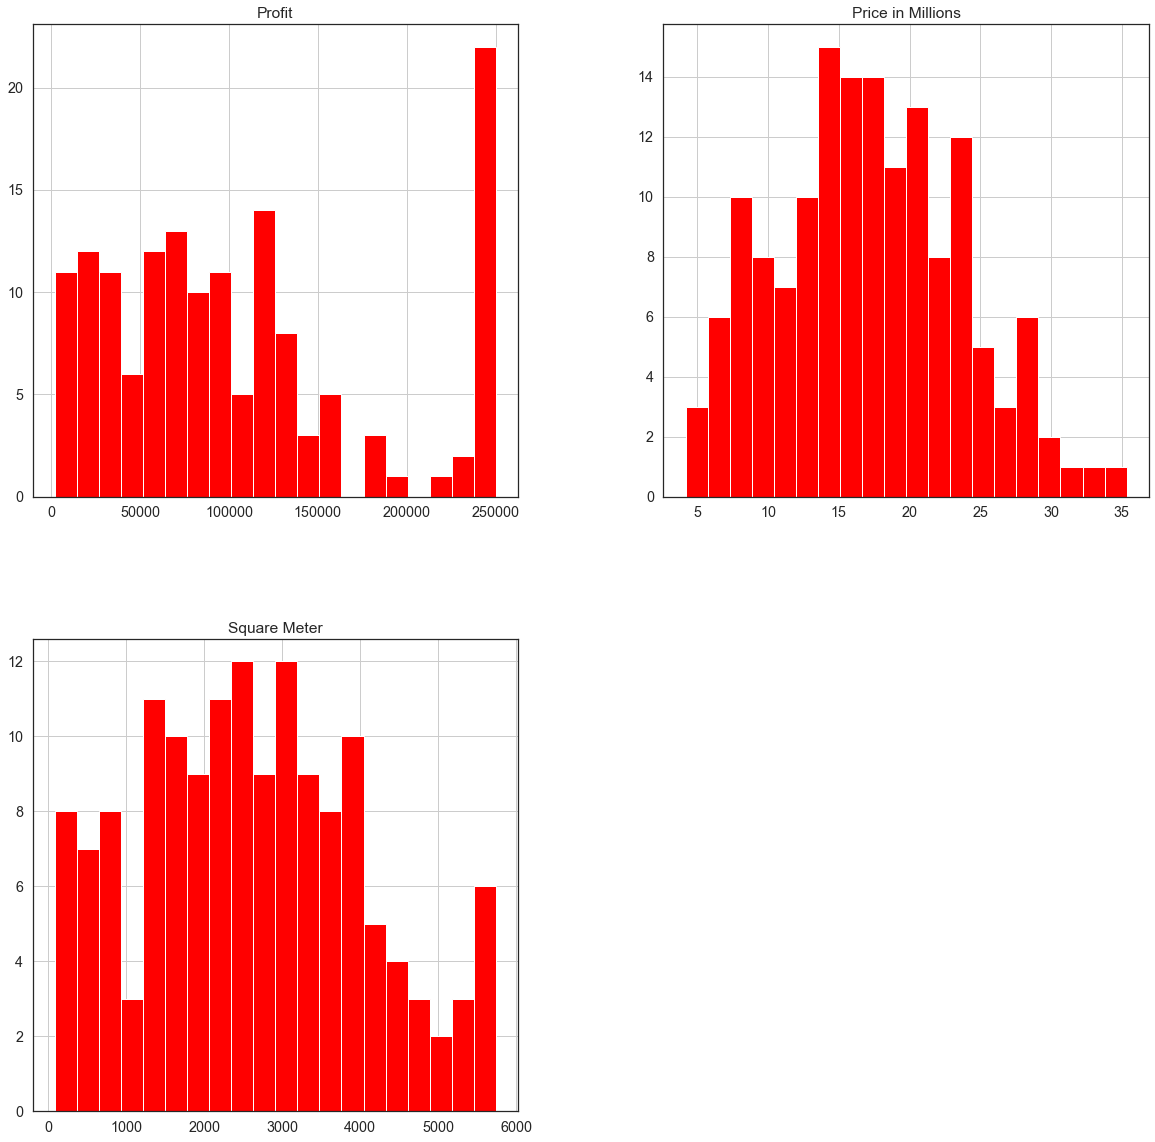

In [40]:
def showqunatvar(data):
    import seaborn as sns
    sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(20,20)})
    ax=data.hist(bins=20,color='red' )
showqunatvar(data)

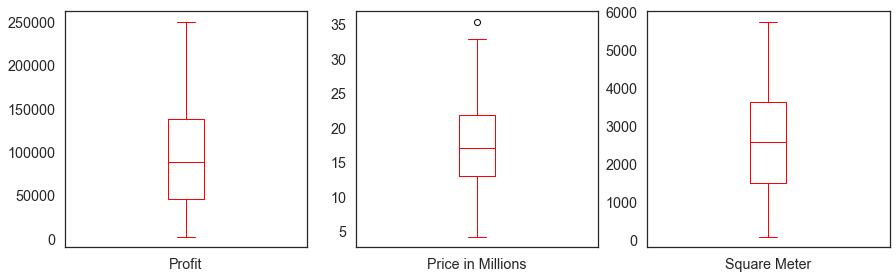

In [41]:
def boxplot(data):
    import matplotlib.pyplot as plt
    data.plot( kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False,color='red')
    plt.show()
boxplot(data)

In [42]:
def isnull(data):
    print(data.isnull().sum().sort_values(ascending=False).head())
isnull(data)

Profit               0
Price in Millions    0
Square Meter         0
dtype: int64


# Problem of standardisation

In [43]:
def standandreduct(data):
    from sklearn.preprocessing import StandardScaler
    std_scaler = StandardScaler()
    data_cluster=data.copy()
    data_cluster[data_cluster.columns]=std_scaler.fit_transform(data_cluster)
    return(data_cluster)
data_cluster=standandreduct(data)

data_cluster.describe() #Checking if the Standardization was made correctly, looking for mean=0 and std=1

,Profit,Price in Millions,Square Meter
count,150.00,150.00,150.00
mean,-0.00,0.00,0.00
std,1.00,1.00,1.00
min,-1.37,-1.99,-1.76
25%,-0.80,-0.65,-0.77
50%,-0.23,-0.00,-0.01
75%,0.42,0.72,0.72
max,1.89,2.80,2.20


In [44]:
def poid2axes(data_cluster):
    import numpy as np
    from sklearn.decomposition import PCA
    pca_2 = PCA(2)
    pca_2_result = pca_2.fit_transform(data_cluster)
    print ('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))
poid2axes(data_cluster)

Cumulative variance explained by 2 principal components: 97.14%


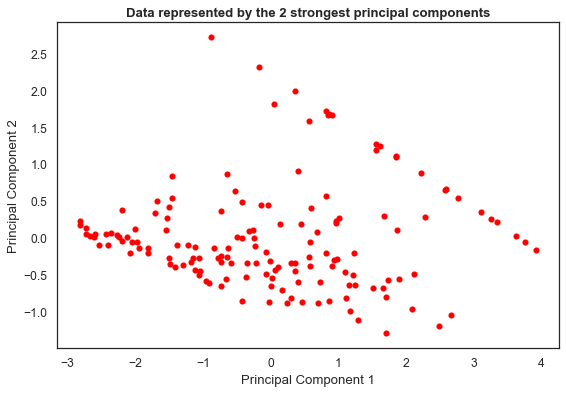

In [45]:
def ploting2principalcomp(data_cluster):
    from sklearn.decomposition import PCA
    pca_2 = PCA(2)
    pca_2_result = pca_2.fit_transform(data_cluster)
    sns.set(style='white', rc={'figure.figsize':(9,6)},font_scale=1.1)

    plt.scatter(x=pca_2_result[:, 0], y=pca_2_result[:, 1], color='red',lw=0.1)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Data represented by the 2 strongest principal components',fontweight='bold')
    plt.show()
ploting2principalcomp(data_cluster)

In [46]:
def inertiaperaxe(data_cluster):
    import sklearn.cluster as cluster

    inertia = []
    for i in tqdm(range(2,10)):
        kmeans = cluster.KMeans(n_clusters=i,
                   init='k-means++',
                   n_init=15,
                    max_iter=500,
                   random_state=17)
        kmeans.fit(data_cluster)
        inertia.append(kmeans.inertia_)
    return(inertia)
inertia=inertiaperaxe(data_cluster)

100%|██████████| 8/8 [00:00<00:00, 16.57it/s]


In [47]:
def silhouetperaxe(data_cluster):
    import sklearn.cluster as cluster
    from sklearn.metrics import silhouette_score
    silhouette = {}
    for i in tqdm(range(2,10)):
        kmeans = cluster.KMeans(n_clusters=i,
                   init='k-means++',
                   n_init=15,
                   max_iter=500,
                   random_state=17)
        kmeans.fit(data_cluster)
        silhouette[i] = silhouette_score(data_cluster, kmeans.labels_, metric='euclidean')
    return(silhouette)
silhouette=silhouetperaxe(data_cluster)

100%|██████████| 8/8 [00:00<00:00, 16.27it/s]


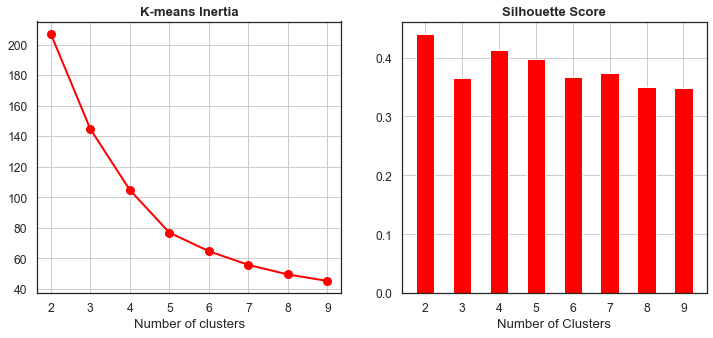

In [48]:
def coudsilou(inertia,silhouette):
    sns.set(style='white',font_scale=1.1, rc={'figure.figsize':(12,5)})

    plt.subplot(1, 2, 1)

    plt.plot(range(2,len(inertia)+2), inertia, marker='o',lw=2,ms=8,color='red')
    plt.xlabel('Number of clusters')
    plt.title('K-means Inertia',fontweight='bold')
    plt.grid(True)

    plt.subplot(1, 2, 2)

    plt.bar(range(len(silhouette)), list(silhouette.values()), align='center',color= 'red',width=0.5)
    plt.xticks(range(len(silhouette)), list(silhouette.keys()))
    plt.grid()
    plt.title('Silhouette Score',fontweight='bold')
    plt.xlabel('Number of Clusters')

    plt.show()
coudsilou(inertia,silhouette)

In [49]:
def kmeans(data_cluster,k):
    import sklearn.cluster as cluster
    kmeans = cluster.KMeans(n_clusters=k,random_state=17,init='k-means++')
    return(kmeans)
km=kmeans(data_cluster,2)

In [50]:
def klabels(km):
    kmeans_labels = km.fit_predict(data_cluster)
    return(kmeans_labels)
kmeans_labels=klabels(km)
pd.Series(kmeans_labels).value_counts() #nombre d'individu dans chaque classe

0    80
1    70
dtype: int64

In [51]:
def pca_2(data_cluster):
    from sklearn.decomposition import PCA
    pca_2 = PCA(2)
    pca_2_result = pca_2.fit_transform(data_cluster)
    return(pca_2_result,pca_2)
pca_2_result,pca_2=pca_2(data_cluster)

In [52]:
def lescentre(km):
    from sklearn.decomposition import PCA
    centroids = km.cluster_centers_
    centroids_pca = pca_2.transform(centroids)
    return(centroids,centroids_pca)
centroids,centroids_pca=lescentre(km)

C:\Users\user\.conda\envs\tens_scik\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [53]:
def copydata(data,kmeans_labels):
    data2=data.copy()
    data2['Cluster']=kmeans_labels
    return(data2)
data2=copydata(data,kmeans_labels)

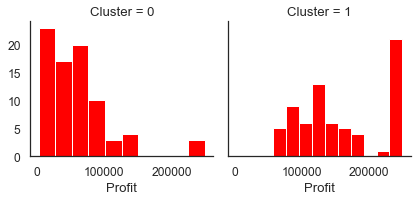

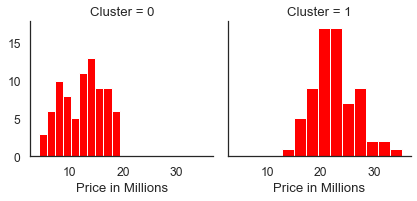

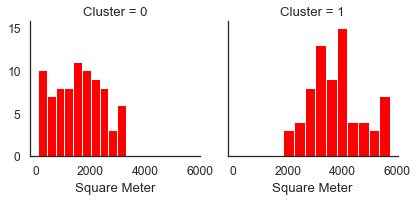

In [54]:
def ploting_diff_between_classes(data2):
    aux=data2.columns.tolist()
    for cluster in aux[0:len(aux)-1]:
        grid= sns.FacetGrid(data2, col='Cluster')
        grid.map(plt.hist, cluster,color='red')
ploting_diff_between_classes(data2)

In [55]:
def center_characteristics(data,centroids):
    import pandas as pd
    from sklearn.preprocessing import StandardScaler
    std_scaler = StandardScaler()
    data_cluster=data.copy()
    data_cluster[data_cluster.columns]=std_scaler.fit_transform(data_cluster)
    centroids_data=pd.DataFrame(data=std_scaler.inverse_transform(centroids), columns=data.columns)
    print(centroids_data.head())
center_characteristics(data,centroids)

     Profit  Price in Millions  Square Meter
0  59450.00              12.37       1572.05
1 159471.43              22.52       3763.40


In [56]:
def pca_2(data_cluster):
    from sklearn.decomposition import PCA
    pca_2 = PCA(2)
    pca_2_result = pca_2.fit_transform(data_cluster)
    return(pca_2_result,pca_2)
pca_2_result,pca_2=pca_2(data_cluster)

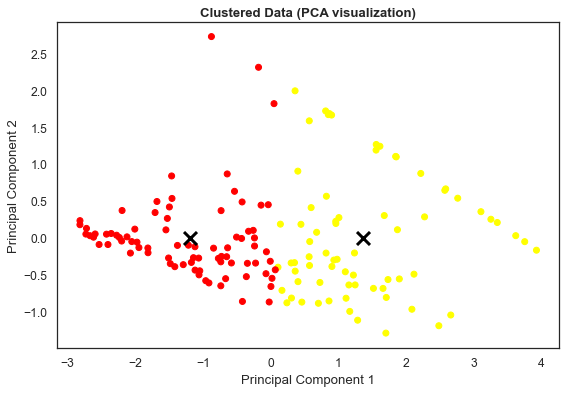

In [57]:
def FinalPCAshow(pca_2_result,centroids_pca):
    sns.set(style='white', rc={'figure.figsize':(9,6)},font_scale=1.1)

    plt.scatter(x=pca_2_result[:, 0], y=pca_2_result[:, 1], c=kmeans_labels, cmap='autumn')
    plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
                marker='x', s=169, linewidths=3,
                color='black', zorder=10,lw=3)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Clustered Data (PCA visualization)',fontweight='bold')
    plt.show()
FinalPCAshow(pca_2_result,centroids_pca)   